Ioannis Vourkas 10032

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

In [28]:
#plots


def future_price(future_name):
    future_data = pd.read_csv('futures/' + future_name + '.csv', parse_dates=['Date'])
    future_data['Date'] = pd.to_datetime(future_data['Date'])
    future_data.set_index('Date', inplace=True)
    
    plt.figure(figsize=(15, 6))
   
    plt.plot(future_data.index, future_data['Price'], label=future_name + ' Price')

    plt.xlabel('Date')
    if future_name == 'TTF': 
        plt.ylabel('TTF futures price [€/MWh]')
    elif future_name == 'Brent':
        plt.ylabel('Brent futures price [$/bbl]')
    elif future_name == 'EUAs':
        plt.ylabel('CO2 emissions futures price [€/Τ]')
    plt.title(future_name + ' Price')
    plt.legend()
    plt.grid(True)
    plt.show()


  


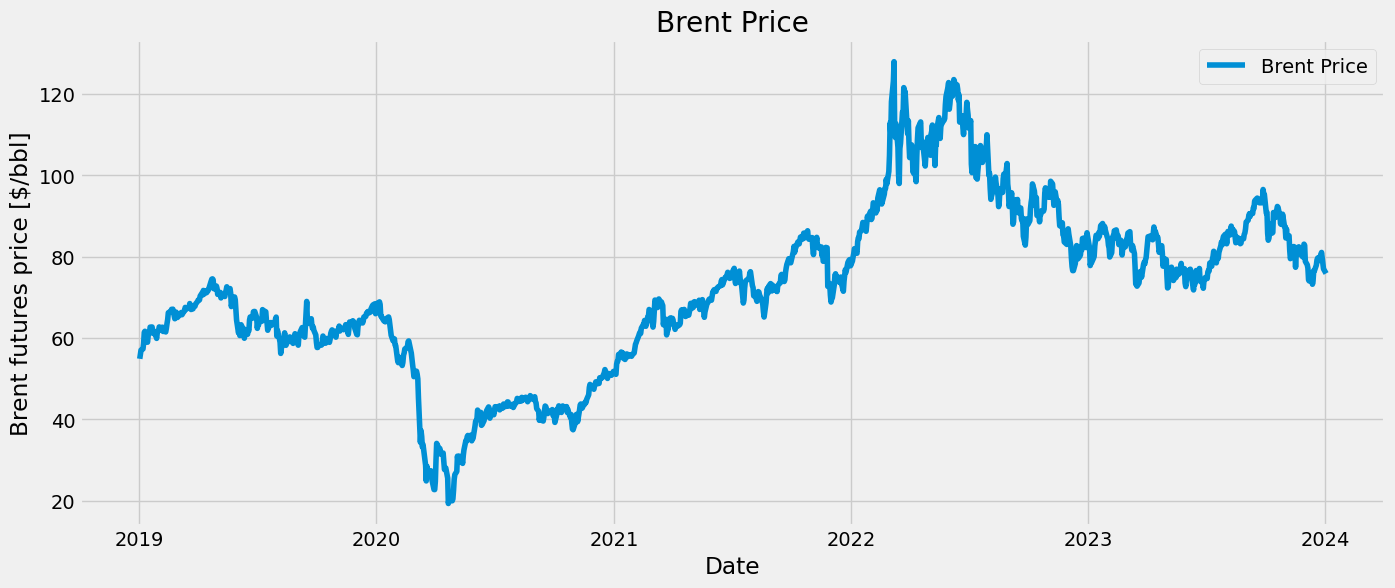

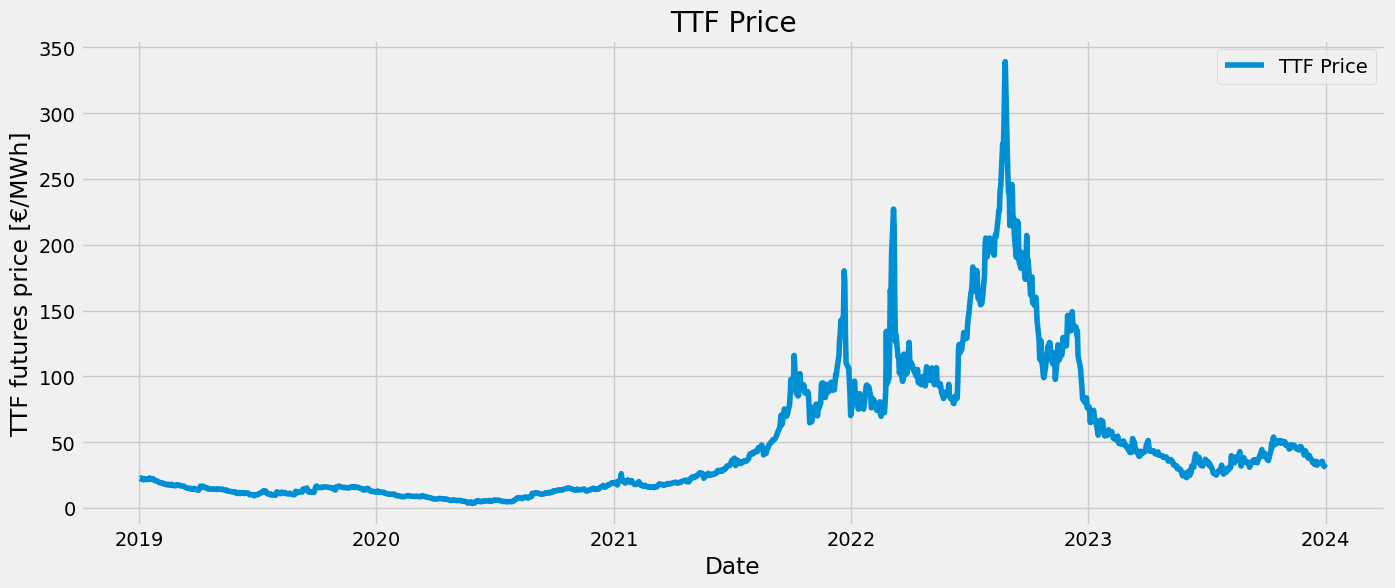

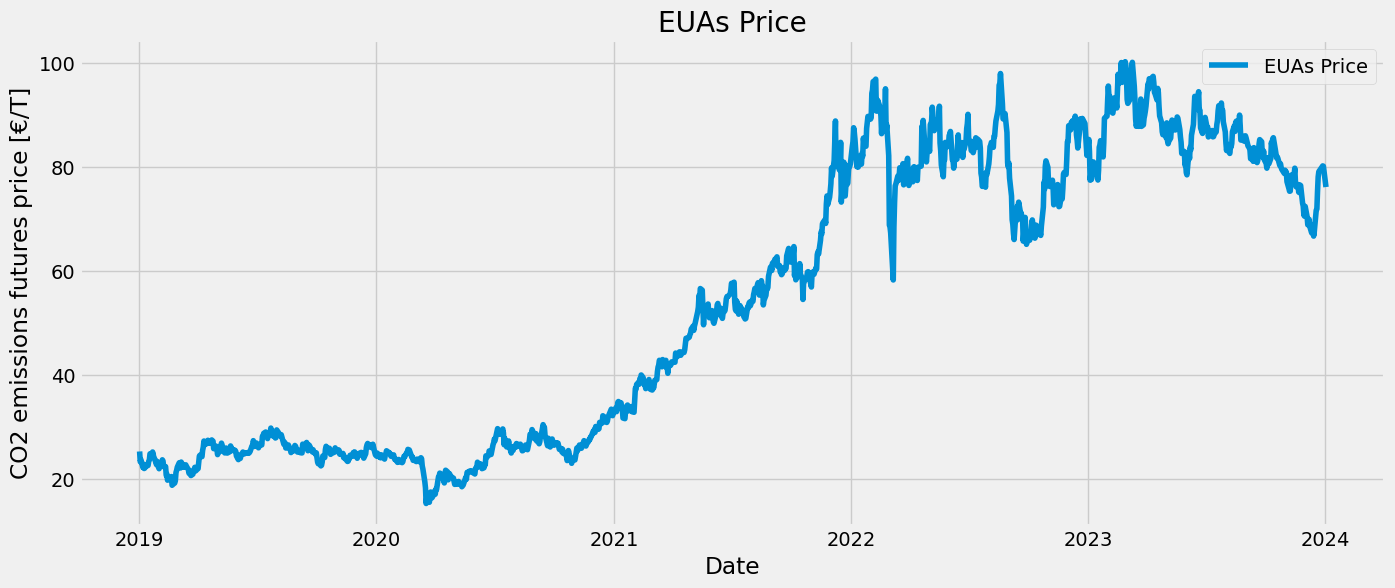

In [29]:
future_price('Brent')
future_price('TTF')
future_price('EUAs')

In [30]:
#This function highlights specific date intervals.
#Covid-19 Period->2020-03-11(Trump declared covid-19 a public emergency ) to 2021-08-23(FDA approves the pfizer vaccine).
#Ukraine war ->2022-02-24(Russia invaded Ukraine) to 2023-02-24(12 months after)
#Israel war -> 2023-10-07(Hamas first attack) to '2023-12-31'(the end of the dataframe being analyzed)

def mod_future_price(future_name):
    future_data = pd.read_csv('futures/' + future_name + '.csv', parse_dates=['Date'])
    future_data['Date'] = pd.to_datetime(future_data['Date'])
    future_data.set_index('Date', inplace=True)
    
    plt.figure(figsize=(15, 6))
   
    plt.plot(future_data.index, future_data['Price'], label=future_name + ' Price')

    plt.xlabel('Date')
    if future_name == 'TTF': 
        plt.ylabel('TTF futures price [€/MWh]')
    elif future_name == 'Brent':
        plt.ylabel('Brent futures price [$/bbl]')
    elif future_name == 'EUAs':
        plt.ylabel('CO2 emissions futures price [€/Τ]')
    plt.title(future_name + ' Price')
    
    # Highlighting date intervals with different colors
    plt.axvspan('2020-01-31', '2021-08-23', color='yellow', alpha=0.3, label='Covid-19')
    plt.axvspan('2022-02-24', '2023-02-24', color='green', alpha=0.3, label='Ukraine War')
    plt.axvspan('2023-10-07', '2023-12-31', color='blue', alpha=0.3, label='Israel War')
    
    plt.legend()
    plt.grid(True)
    plt.show()

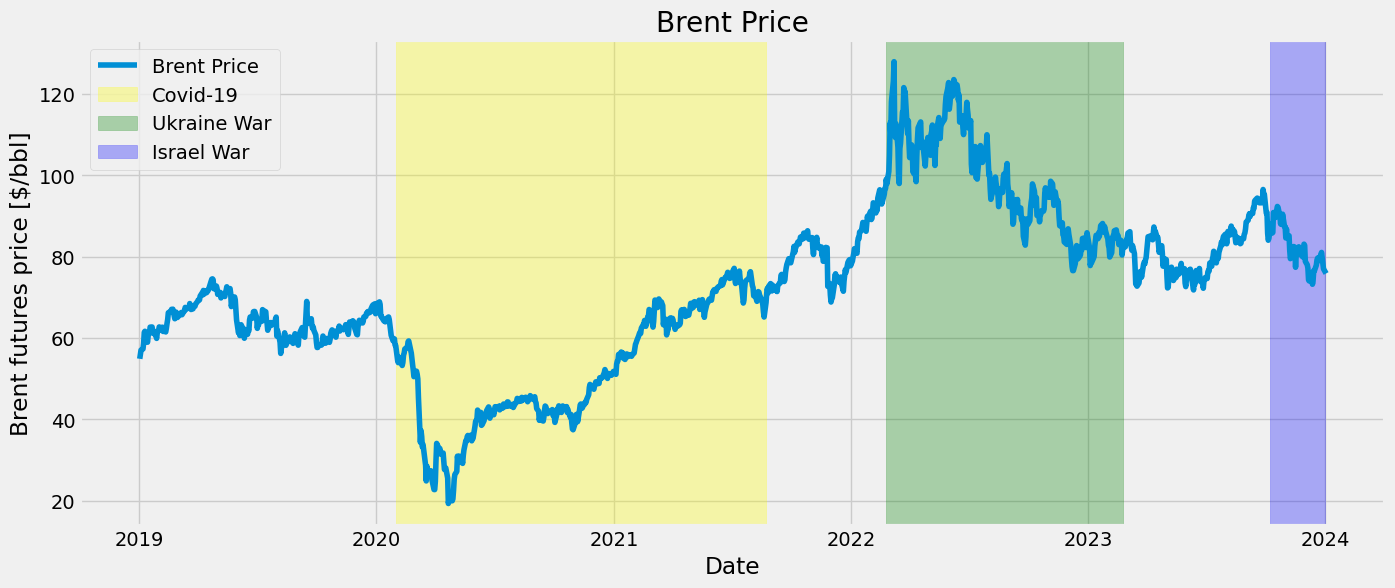

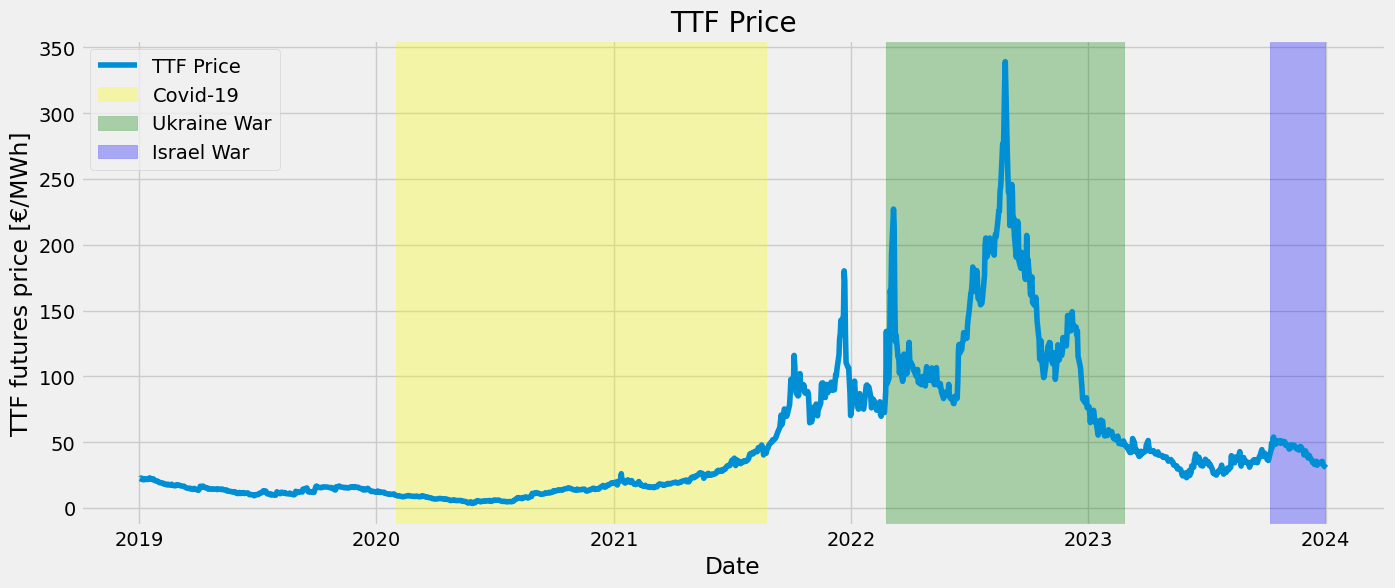

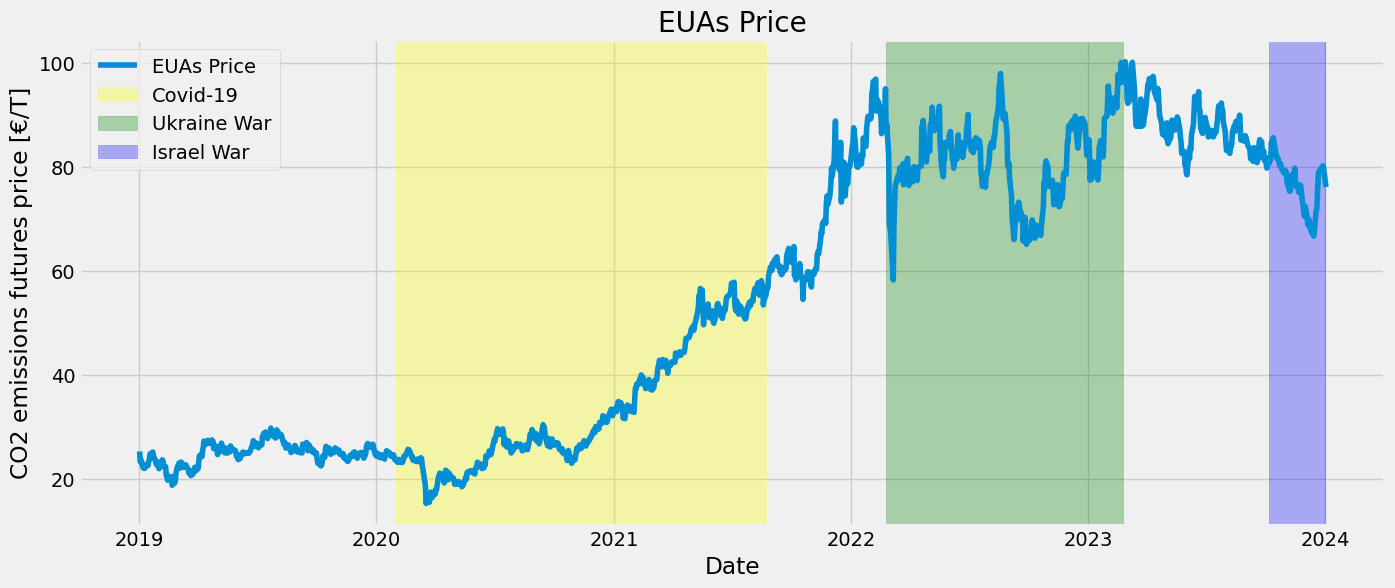

In [31]:
mod_future_price('Brent')
mod_future_price('TTF')
mod_future_price('EUAs')

Index(['Price_x', 'Open_x', 'High_x', 'Low_x', 'Vol._x', 'Change %_x',
       'Price_y', 'Open_y', 'High_y', 'Low_y', 'Vol._y', 'Change %_y', 'Price',
       'Open', 'High', 'Low', 'Vol.', 'Change %'],
      dtype='object')


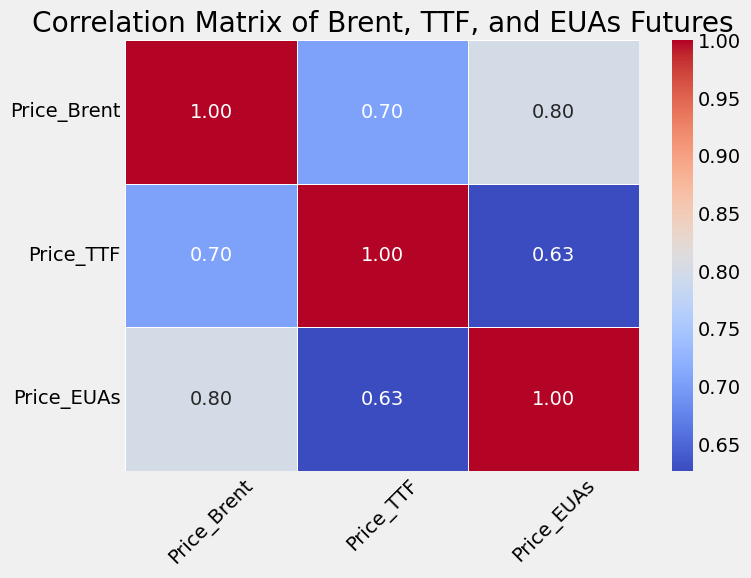

In [32]:
#correlation between Brent, TTF and EUAs 

# Read data and set index to datetime
brent_data = pd.read_csv('futures/Brent.csv')
brent_data['Date'] = pd.to_datetime(brent_data['Date'])
brent_data.set_index('Date', inplace=True)

ttf_data = pd.read_csv('futures/TTF.csv')
ttf_data['Date'] = pd.to_datetime(ttf_data['Date'])
ttf_data.set_index('Date', inplace=True)

euas_data = pd.read_csv('futures/EUAs.csv')
euas_data['Date'] = pd.to_datetime(euas_data['Date'])
euas_data.set_index('Date', inplace=True)

# Merge the three datasets on the 'Date' column
merged_data = pd.merge(brent_data, ttf_data, on='Date')
merged_data = pd.merge(merged_data, euas_data, on='Date')

# Extract the price columns
print(merged_data.columns)
prices = merged_data[['Price_x', 'Price_y', 'Price']]

# Rename columns for clarity
prices.columns = ['Price_Brent', 'Price_TTF', 'Price_EUAs']

# Calculate the correlation matrix
correlation_matrix = prices.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Brent, TTF, and EUAs Futures')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Index(['Price_x', 'Open_x', 'High_x', 'Low_x', 'Vol._x', 'Change %_x',
       'Price_y', 'Open_y', 'High_y', 'Low_y', 'Vol._y', 'Change %_y', 'Price',
       'Open', 'High', 'Low', 'Vol.', 'Change %', 'Country', 'ISO3 Code',
       'Price (EUR/MWhe) '],
      dtype='object')


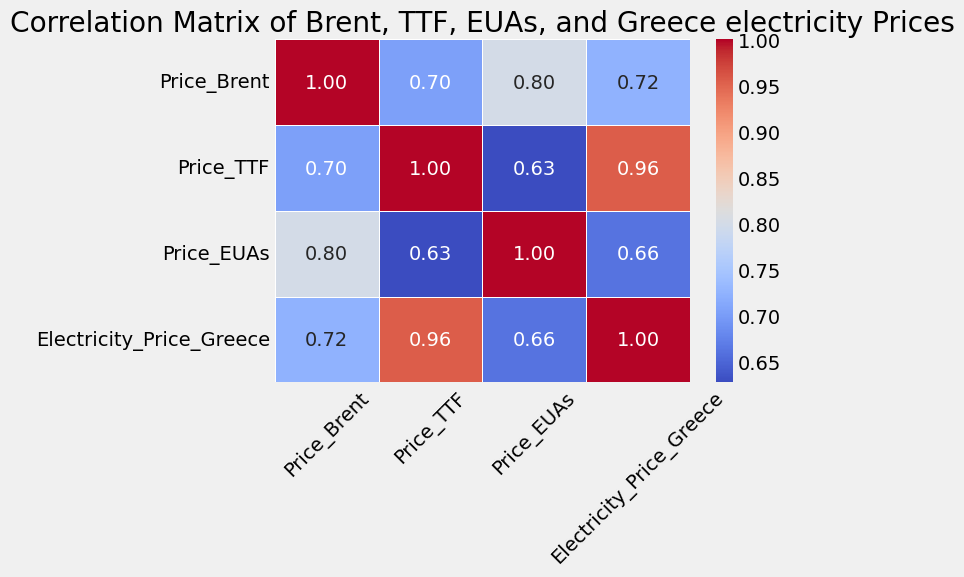

In [33]:

#correlation between Brent, TTF, EUAs and a random country



# Read data and set index to datetime
brent_data = pd.read_csv('futures/Brent.csv')
brent_data['Date'] = pd.to_datetime(brent_data['Date'])
brent_data.set_index('Date', inplace=True)

# Sort datetime index
brent_data.sort_index(inplace=True)

# Slice the DataFrame
brent_data = brent_data.loc['2019-01-01':'2023-12-31']



# Read data and set index to datetime
ttf_data = pd.read_csv('futures/TTF.csv')
ttf_data['Date'] = pd.to_datetime(ttf_data['Date'])
ttf_data.set_index('Date', inplace=True)

# Sort datetime index
ttf_data.sort_index(inplace=True)

# Slice the DataFrame
ttf_data = ttf_data.loc['2019-01-01':'2023-12-31']

# Repeat the same process for EUAs data
euas_data = pd.read_csv('futures/EUAs.csv')
euas_data['Date'] = pd.to_datetime(euas_data['Date'])
euas_data.set_index('Date', inplace=True)
euas_data.sort_index(inplace=True)
euas_data = euas_data.loc['2019-01-01':'2023-12-31']

# Repeat the same process for Czechia data
countries = pd.read_csv('dailypricespercountry.csv', parse_dates=['Date'])
Greece = countries.loc[countries['Country'] == 'Greece']
Greece.loc[:, 'Date'] = pd.to_datetime(Greece['Date'])
Greece.set_index('Date', inplace=True)
Greece.sort_index(inplace=True)
Greece =Greece.loc['2019-01-01':'2023-12-31']

# Merge the three datasets on the 'Date' column
merged_data = pd.merge(brent_data, ttf_data, on='Date')
merged_data = pd.merge(merged_data, euas_data, on='Date')
merged_data = pd.merge(merged_data, Greece, on='Date')
print(merged_data.columns)
# Extract the price columns
prices = merged_data[['Price_x', 'Price_y', 'Price', 'Price (EUR/MWhe) ' ]]

# Rename columns for clarity
prices.columns = ['Price_Brent', 'Price_TTF', 'Price_EUAs', 'Electricity_Price_Greece']

# Calculate the correlation matrix
correlation_matrix = prices.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Brent, TTF, EUAs, and Greece electricity Prices')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_14104\293335379.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  statistics_df = pd.concat([statistics_df, pd.DataFrame({'Future': future, 'N': N, 'Range': price_range,


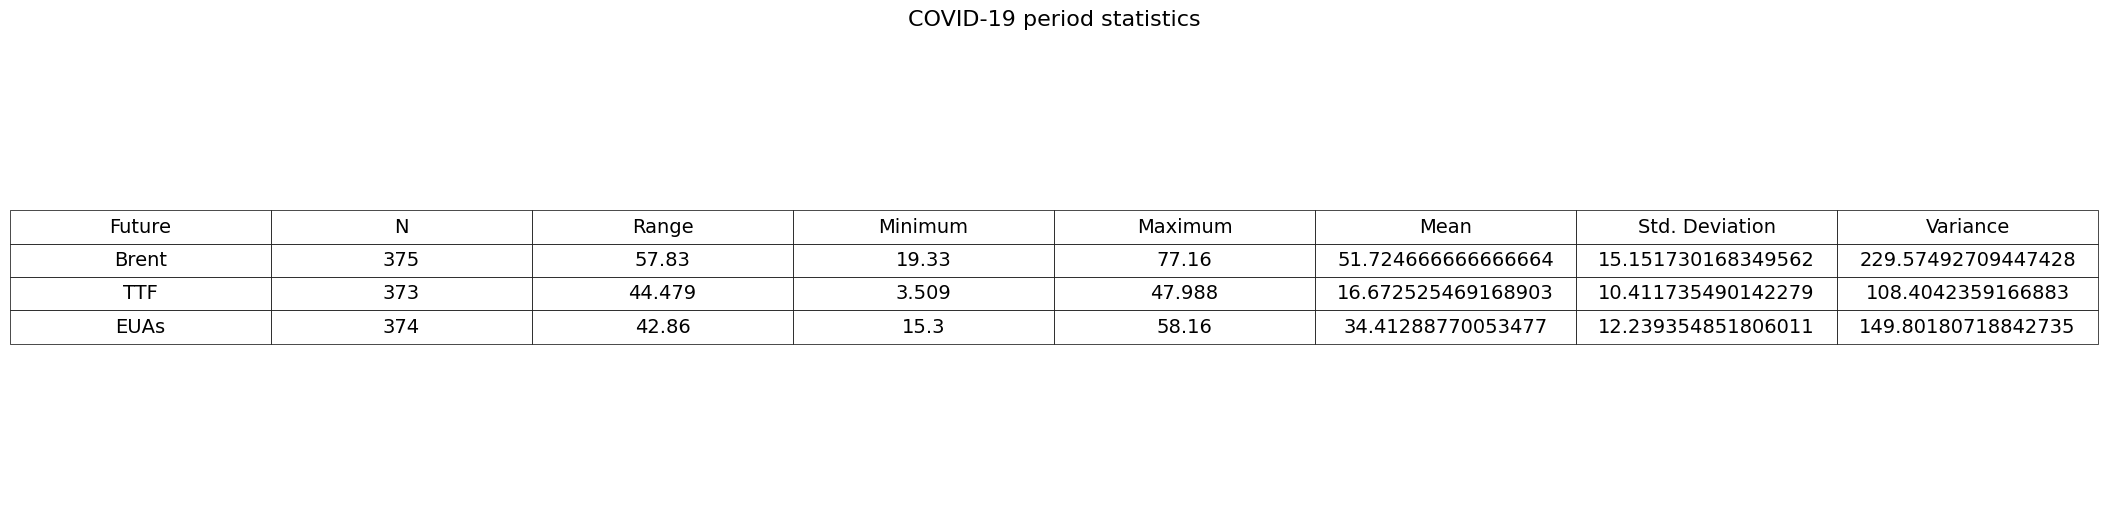

C:\Users\HP\AppData\Local\Temp\ipykernel_14104\293335379.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  statistics_df = pd.concat([statistics_df, pd.DataFrame({'Future': future, 'N': N, 'Range': price_range,


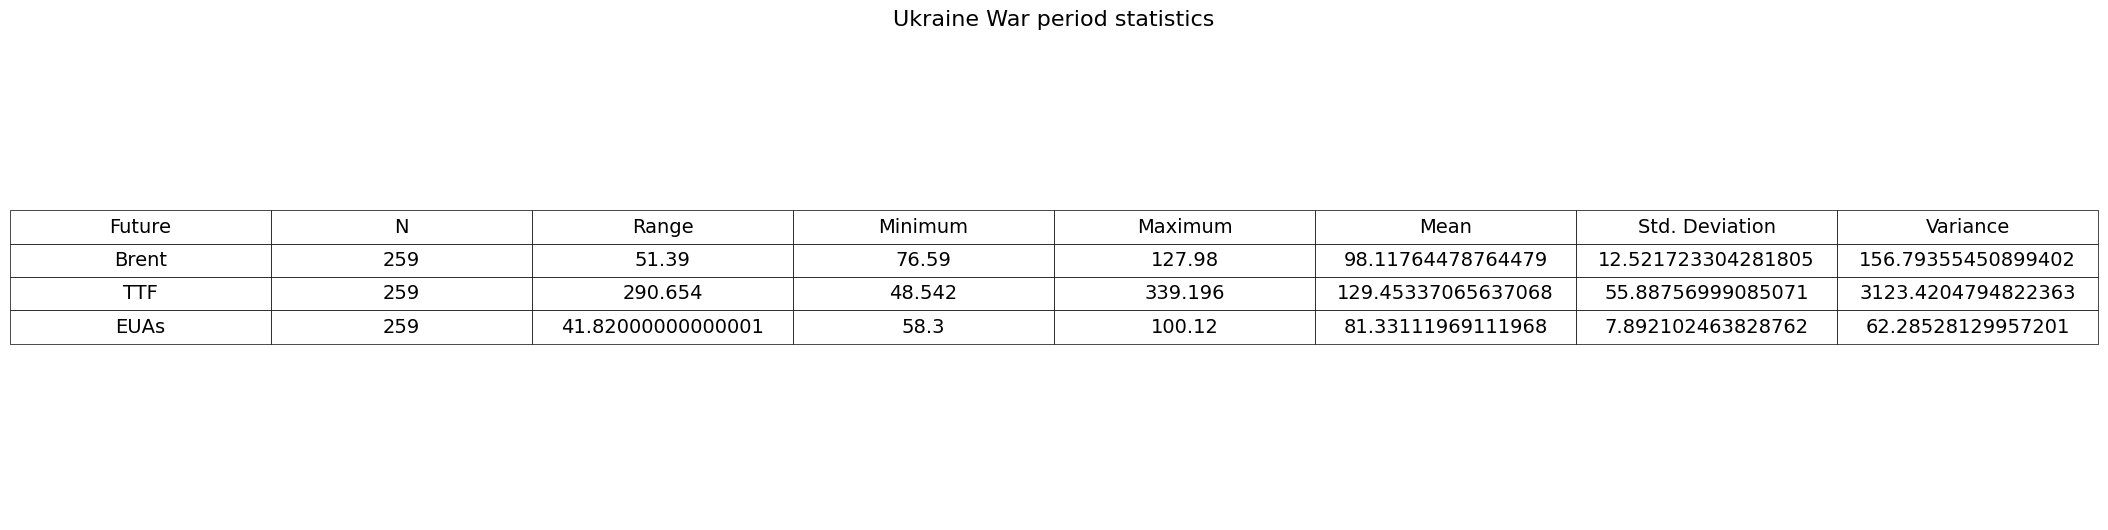

C:\Users\HP\AppData\Local\Temp\ipykernel_14104\293335379.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  statistics_df = pd.concat([statistics_df, pd.DataFrame({'Future': future, 'N': N, 'Range': price_range,


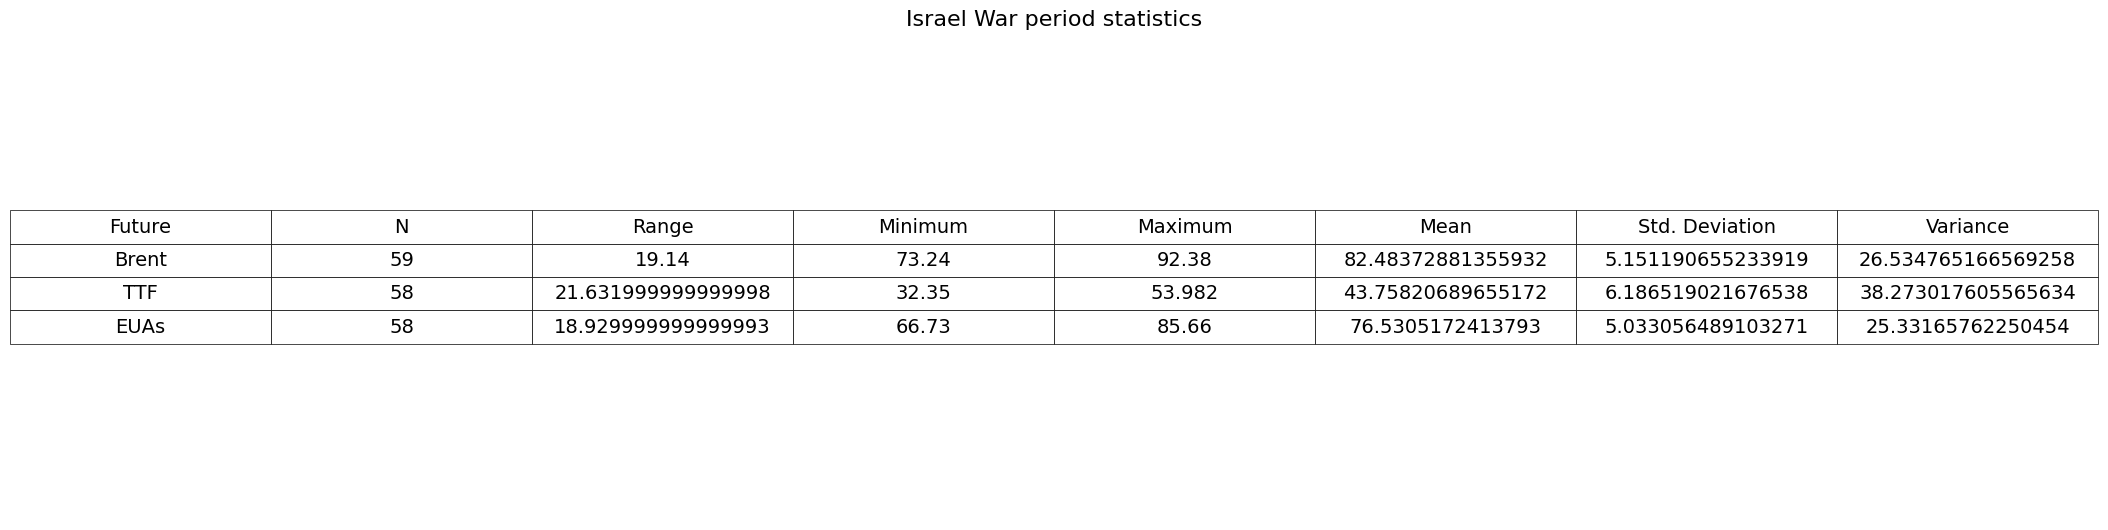

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

def futures_statistics(start_date, end_date):

    # Define countries and time period
    futures_list = ['Brent', 'TTF', 'EUAs']
    
    # Initialize empty DataFrame to store statistics
    statistics_df = pd.DataFrame(columns=['Future', 'N', 'Range', 'Minimum', 'Maximum', 'Mean', 'Std. Deviation', 'Variance'])
    
    # Compute statistics for each country
    for future in futures_list:
        future_data = pd.read_csv('futures/' + future + '.csv', parse_dates=['Date'])
        future_data['Date'] = pd.to_datetime(future_data['Date'])
        future_data.set_index('Date', inplace=True)
        future_data.sort_index(inplace=True)
        future_data = future_data.loc[start_date:end_date]
        
        # Compute descriptive statistics
        N = len(future_data)
        price_range = future_data['Price'].max() - future_data['Price'].min()
        minimum = future_data['Price'].min()
        maximum = future_data['Price'].max()
        mean = future_data['Price'].mean()
        std_deviation = future_data['Price'].std()
        variance = future_data['Price'].var()
        
        # Append statistics to DataFrame
        statistics_df = pd.concat([statistics_df, pd.DataFrame({'Future': future, 'N': N, 'Range': price_range,
                                              'Minimum': minimum, 'Maximum': maximum, 'Mean': mean,
                                              'Std. Deviation': std_deviation, 'Variance': variance}, 
                                             index=[0])], ignore_index=True)
    
    # Convert DataFrame to tabular format
    table = tabulate(statistics_df, headers='keys', tablefmt='grid')
    
    # Determine title based on start and end dates
    if start_date == '2020-03-11' and end_date == '2021-08-23':
        title = 'COVID-19 period statistics'
    elif start_date == '2022-02-24' and end_date == '2023-02-24':
        title = 'Ukraine War period statistics'
    elif start_date == '2023-10-07' and end_date == '2023-12-31':
        title = 'Israel War period statistics'
    else:
        title = 'Custom period statistics'
    
    # Plot the table as an image with a white background
    fig, ax = plt.subplots(figsize=(12, 6), facecolor='white')
    ax.axis('off')
    ax.set_title(title, fontsize=16)  # Set the title with a larger font size
    table = ax.table(cellText=statistics_df.values,
                     colLabels=statistics_df.columns,
                     cellLoc='center',
                     loc='center')
    
    # Set the background color of the table to white and increase font size
    table.set_fontsize(14)
    table.scale(2, 2)  # Adjust the scale to increase cell size
    
    plt.savefig('statistics_table.png', bbox_inches='tight', pad_inches=0.1, facecolor='white')
    plt.show()

# Example usage:
futures_statistics('2020-03-11', '2021-08-23')
futures_statistics('2022-02-24', '2023-02-24')
futures_statistics('2023-10-07','2023-12-31')
